In [676]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.metrics import accuracy_score, classification_report
import math

## Training the Multinomial Logistic Regressor and Random Forest Regressor with Wellness Data

In [935]:
df = pd.read_csv("processed_wellness_data.csv")
df.head()

,duration_of_sleep_hours,level_of_physical_activity_minutes_per_day,level_of_stress_scale_110,bmi_category,heart_rate_bpm,systolic_and_diastolic_blood_pressure,nutrition_intake_calories_breakdown_of_nutrients_etc,level_of_workload_scale_110,quality_or_frequency_of_social_interactions,activities_for_mental_health_such_as_therapy_sessions_or_meditation,...,lifestyle_decisions_such_as_drinking_and_smoking,additional_health_indicators_eg_water_levels_steps,mood_output,mood_output_encoded,demographic_health_grouping,lifestyle_grouping,activity_level_grouping,stress_profile_grouping,social_wellness_grouping,lifestyle_risk_grouping
0,7.5,30,5,Normal,72,120/80,2000 calories (balanced diet),6,"Good, frequent",Meditation daily,...,"No alcohol, no smoking","2 liters, 10,000 steps",Happy,0,UNHEALTHY,NEUTRAL,MODERATELY_ACTIVE,MEDIUM,HIGH,HIGH_RISK
1,6.8,45,3,Overweight,75,118/78,2500 calories (high in carbs),7,"Moderate, occasional",NaN,...,"Occasional alcohol, no smoking","1.5 liters, 8000 steps",Neutral,1,UNHEALTHY,NEUTRAL,ACTIVE,MEDIUM,MODERATE,HIGH_RISK
2,8.2,15,8,Underweight,68,115/75,1800 calories (low in protein),9,"Low, infrequent",Therapy sessions weekly,...,"No alcohol, no smoking","2.5 liters, 5000 steps",Sad,2,UNHEALTHY,GOOD,MODERATELY_ACTIVE,HIGH,HIGH,HIGH_RISK
3,7.0,60,4,Normal,70,122/82,2200 calories (healthy diet),5,"Very good, daily",Yoga twice a week,...,"No alcohol, no smoking","2 liters, 12000 steps",Happy,0,UNHEALTHY,NEUTRAL,ACTIVE,MEDIUM,LOW,HIGH_RISK
4,5.5,10,9,Obese,80,130/90,3000 calories (unhealthy),10,"Poor, infrequent",NaN,...,"Daily alcohol, occasional smoking","1 liter, 3000 steps",Sad,2,UNHEALTHY,NEUTRAL,SEDENTARY,HIGH,HIGH,HIGH_RISK


In [937]:
print(df.columns)

Index(['duration_of_sleep_hours', 'level_of_physical_activity_minutes_per_day',
       'level_of_stress_scale_110', 'bmi_category', 'heart_rate_bpm',
       'systolic_and_diastolic_blood_pressure',
       'nutrition_intake_calories_breakdown_of_nutrients_etc',
       'level_of_workload_scale_110',
       'quality_or_frequency_of_social_interactions',
       'activities_for_mental_health_such_as_therapy_sessions_or_meditation',
       'environmental_aspects_such_as_weather_and_air_quality',
       'lifestyle_decisions_such_as_drinking_and_smoking',
       'additional_health_indicators_eg_water_levels_steps', 'mood_output',
       'mood_output_encoded', 'demographic_health_grouping',
       'lifestyle_grouping', 'activity_level_grouping',
       'stress_profile_grouping', 'social_wellness_grouping',
       'lifestyle_risk_grouping'],
      dtype='object')


## Evaluating feature correlation matrix to choose which features to use

In [940]:
# Cleaning nutrition intake
for i in range(len(df['nutrition_intake_calories_breakdown_of_nutrients_etc'])):
    df.loc[i, 'nutrition_intake_calories_breakdown_of_nutrients_etc'] = df['nutrition_intake_calories_breakdown_of_nutrients_etc'][i][:4]

# Encoding BMI category
encoder_bmi = LabelEncoder()
df['bmi_category_encoded'] = encoder_bmi.fit_transform(df['bmi_category'])

# Cleaning env aspects
for i in range(len(df['environmental_aspects_such_as_weather_and_air_quality'])):
    df.loc[i, 'environmental_aspects_such_as_weather_and_air_quality'] = df['environmental_aspects_such_as_weather_and_air_quality'][i].split(',')[0]

# Encoding cleaned env aspects
encoder_env = LabelEncoder()
df['environmental_aspects_such_as_weather_and_air_quality'] = encoder_env.fit_transform(df['environmental_aspects_such_as_weather_and_air_quality'])

# Converting mood output values
for i in np.where(df["mood_output"] == 'Sad'):
    df.loc[i, "mood_output"] = "Negative"
for i in np.where(df["mood_output"] == 'Happy'):
    df.loc[i, "mood_output"] = "Positive" 

# Encoding mood_output
encoder_mood = LabelEncoder()
df["mood_output_encoded"] = encoder_mood.fit_transform(df["mood_output"])

# Creating quality of sleep column
df['quality_of_sleep_110'] = df['duration_of_sleep_hours']
for i in range(len(df['duration_of_sleep_hours'])):
    df.loc[i, 'quality_of_sleep_110'] = math.ceil(df['duration_of_sleep_hours'][i])

df.head()

,duration_of_sleep_hours,level_of_physical_activity_minutes_per_day,level_of_stress_scale_110,bmi_category,heart_rate_bpm,systolic_and_diastolic_blood_pressure,nutrition_intake_calories_breakdown_of_nutrients_etc,level_of_workload_scale_110,quality_or_frequency_of_social_interactions,activities_for_mental_health_such_as_therapy_sessions_or_meditation,...,mood_output,mood_output_encoded,demographic_health_grouping,lifestyle_grouping,activity_level_grouping,stress_profile_grouping,social_wellness_grouping,lifestyle_risk_grouping,bmi_category_encoded,quality_of_sleep_110
0,7.5,30,5,Normal,72,120/80,2000,6,"Good, frequent",Meditation daily,...,Positive,2,UNHEALTHY,NEUTRAL,MODERATELY_ACTIVE,MEDIUM,HIGH,HIGH_RISK,0,8.0
1,6.8,45,3,Overweight,75,118/78,2500,7,"Moderate, occasional",NaN,...,Neutral,1,UNHEALTHY,NEUTRAL,ACTIVE,MEDIUM,MODERATE,HIGH_RISK,2,7.0
2,8.2,15,8,Underweight,68,115/75,1800,9,"Low, infrequent",Therapy sessions weekly,...,Negative,0,UNHEALTHY,GOOD,MODERATELY_ACTIVE,HIGH,HIGH,HIGH_RISK,3,9.0
3,7.0,60,4,Normal,70,122/82,2200,5,"Very good, daily",Yoga twice a week,...,Positive,2,UNHEALTHY,NEUTRAL,ACTIVE,MEDIUM,LOW,HIGH_RISK,0,7.0
4,5.5,10,9,Obese,80,130/90,3000,10,"Poor, infrequent",NaN,...,Negative,0,UNHEALTHY,NEUTRAL,SEDENTARY,HIGH,HIGH,HIGH_RISK,1,6.0


<Axes: >

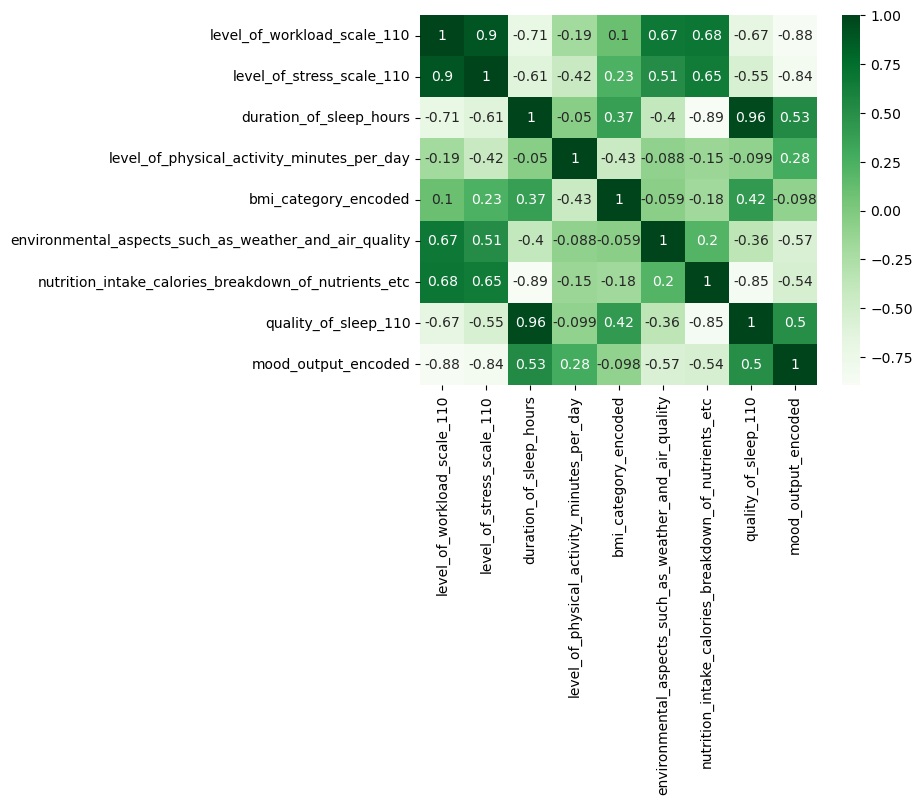

In [942]:
corr_features = ["level_of_workload_scale_110", "level_of_stress_scale_110", "duration_of_sleep_hours", 
                        "level_of_physical_activity_minutes_per_day", 'bmi_category_encoded', 'environmental_aspects_such_as_weather_and_air_quality'
                , 'nutrition_intake_calories_breakdown_of_nutrients_etc', 'quality_of_sleep_110', 'mood_output_encoded']

corre = df[corr_features].corr()['mood_output_encoded']

testingdf = df[corr_features]
matrix = testingdf.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

From the correlation matrix, we will be using the ["duration_of_sleep_hours", "level_of_physical_activity_minutes_per_day", "quality_of_sleep_110"] as a selected features to train the models.

In [945]:
# selected_features = df[["level_of_workload_scale_110", "level_of_stress_scale_110", "duration_of_sleep_hours", 
#                         "level_of_physical_activity_minutes_per_day", "environmental_aspects_such_as_weather_and_air_quality", 
#                         "nutrition_intake_calories_breakdown_of_nutrients_etc", "quality_of_sleep_110"]]

selected_features = df[["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_stress_scale_110", 
                                "level_of_workload_scale_110"]]

X_training, X_rest, y_training, y_rest = train_test_split(selected_features, target, test_size = 0.3, random_state = 42)
X_validating, X_testing, y_validating, y_testing = train_test_split(X_rest, y_rest, test_size = 0.5, random_state = 42)

print("Total number of data:", df.shape[0])
print("Training set:", X_training.shape[0])
print("Validation set:", X_validating.shape[0])
print("Testing set:", X_testing.shape[0])

Total number of data: 737
Training set: 515
Validation set: 111
Testing set: 111


In [947]:
Mul_Norm_LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000)

Mul_Norm_LogReg.fit(X_training, y_training)
print("Training Done")

Training Done


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [949]:
rand_for = RandomForestRegressor(random_state = 42)

rand_for.fit(X_training, y_training)
print("Training Done")

Training Done


In [951]:
# Validation
Mul_Norm_vali_pred = Mul_Norm_LogReg.predict(X_validating)
rand_for_vali_pred = rand_for.predict(X_validating)

# print(accuracy_score(y_validating, Mul_Norm_LogReg.predict(X_validating)))
# print(accuracy_score(y_validating, rand_for.predict(X_validating)))

Mul_Norm_test_pred = Mul_Norm_LogReg.predict(X_testing)
rand_for_test_pred = rand_for.predict(X_testing)

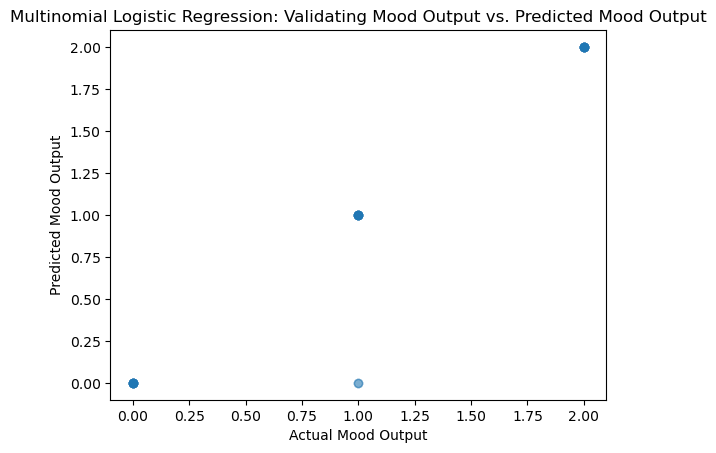

In [953]:
plt.scatter(y_validating, y = Mul_Norm_vali_pred, alpha = 0.1)
plt.title("Multinomial Logistic Regression: Validating Mood Output vs. Predicted Mood Output")
plt.xlabel("Actual Mood Output")
plt.ylabel("Predicted Mood Output")
plt.show()

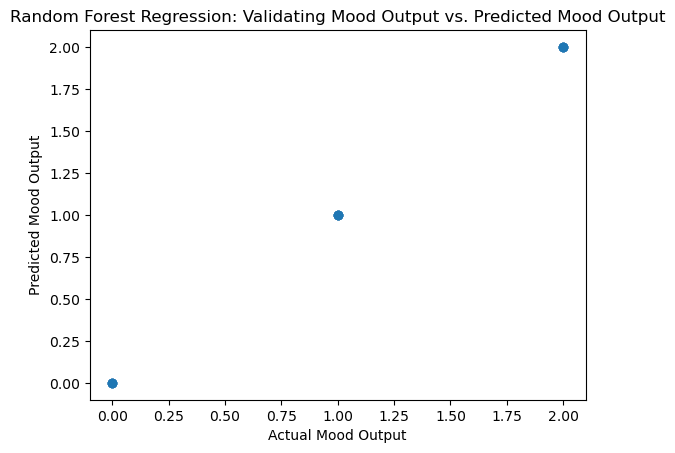

In [955]:
plt.scatter(y_validating, y = rand_for_vali_pred, alpha = 0.1)
plt.title("Random Forest Regression: Validating Mood Output vs. Predicted Mood Output")
plt.xlabel("Actual Mood Output")
plt.ylabel("Predicted Mood Output")
plt.show()

In [957]:
Mul_Norm_MAE = MAE(y_testing, Mul_Norm_test_pred)
Mul_Norm_MSE = MSE(y_testing, Mul_Norm_test_pred)
Mul_Norm_R2 = R2(y_testing, Mul_Norm_test_pred)

rand_for_MAE = MAE(y_testing, rand_for_test_pred)
rand_for_MSE = MSE(y_testing, rand_for_test_pred)
rand_for_R2 = R2(y_testing, rand_for_test_pred)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", Mul_Norm_MAE)
print("Mean Square Error:", Mul_Norm_MSE)
print("R-2 Score:", Mul_Norm_R2)
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", rand_for_MAE)
print("Mean Square Error:", rand_for_MSE)
print("R-2 Score:", rand_for_R2)

Multinomial Logistic Regression:
Mean Absolute Error: 0.0990990990990991
Mean Square Error: 0.0990990990990991
R-2 Score: 0.8619715125480443

Random Forest Regression:
Mean Absolute Error: 0.0
Mean Square Error: 0.0
R-2 Score: 1.0


We see that since the processed_wellness_data.csv has about 700 rows, the multinomial logistic regression model could not converge enough to find and fit into the trend of the data, while the random forest regression model, due to its characteristics, could fit too well to the about 500 training data. Thus, as shown with the Mean Absolute Error, Mean Square Error, and R-2 Score, we can understand that the multinomial logistic regression model is underfitting due to the lack of informaion from the training data, and the random forest regression model is overfitting to the training data as the size of the training data is too small and instead of underfitting due to lack of the information, it overfits to the treds in the small size of the data for its characteristic of boosting.

## Using the Augmented wellness_data.csv to train, validate, and test the models.

In [961]:
# df_aug = pd.read_csv("Refined_Augmented_Wellness_Dataset.csv")
df_aug = pd.read_csv("Augmented_Wellness_Dataset.csv")
df_aug.head()

,level_of_workload_scale_110,level_of_stress_scale_110,duration_of_sleep_hours,level_of_physical_activity_minutes_per_day,environmental_aspects_such_as_weather_and_air_quality,nutrition_intake_calories_breakdown_of_nutrients_etc,mood_output
0,6.0,5.0,7.5,30.0,"Sunny, good air quality",2000 calories (balanced diet),Happy
1,7.0,3.0,6.8,45.0,"Rainy, poor air quality",2500 calories (high in carbs),Neutral
2,9.0,8.0,8.2,15.0,"Sunny, good air quality",1800 calories (low in protein),Sad
3,5.0,4.0,7.0,60.0,"Cloudy, moderate air quality",2200 calories (healthy diet),Happy
4,10.0,9.0,5.5,10.0,"Sunny, good air quality",3000 calories (unhealthy),Sad


In [963]:
df_aug.shape[0]

1400

In [965]:
# Cleaning nutrition intake
for i in range(len(df_aug['nutrition_intake_calories_breakdown_of_nutrients_etc'])):
    df_aug.loc[i, 'nutrition_intake_calories_breakdown_of_nutrients_etc'] = df_aug['nutrition_intake_calories_breakdown_of_nutrients_etc'][i][:4]

# Cleaning env aspects
for i in range(len(df_aug['environmental_aspects_such_as_weather_and_air_quality'])):
    df_aug.loc[i, 'environmental_aspects_such_as_weather_and_air_quality'] = df_aug['environmental_aspects_such_as_weather_and_air_quality'][i].split(',')[0]

# Encoding cleaned env aspects
df_aug['environmental_aspects_such_as_weather_and_air_quality'] = encoder_env.transform(df_aug['environmental_aspects_such_as_weather_and_air_quality'])

# Converting mood output values
for i in np.where(df_aug["mood_output"] == 'Sad'):
    df_aug.loc[i, "mood_output"] = "Negative"
for i in np.where(df_aug["mood_output"] == 'Happy'):
    df_aug.loc[i, "mood_output"] = "Positive" 

# Encoding mood_output
df_aug["mood_output_encoded"] = encoder_mood.transform(df_aug["mood_output"])

# Creating quality of sleep column
df_aug['quality_of_sleep_110'] = df_aug['duration_of_sleep_hours']
for i in range(len(df_aug['duration_of_sleep_hours'])):
    df_aug.loc[i, 'quality_of_sleep_110'] = math.ceil(df_aug['duration_of_sleep_hours'][i])

df_aug.head()

,level_of_workload_scale_110,level_of_stress_scale_110,duration_of_sleep_hours,level_of_physical_activity_minutes_per_day,environmental_aspects_such_as_weather_and_air_quality,nutrition_intake_calories_breakdown_of_nutrients_etc,mood_output,mood_output_encoded,quality_of_sleep_110
0,6.0,5.0,7.5,30.0,2,2000,Positive,2,8.0
1,7.0,3.0,6.8,45.0,1,2500,Neutral,1,7.0
2,9.0,8.0,8.2,15.0,2,1800,Negative,0,9.0
3,5.0,4.0,7.0,60.0,0,2200,Positive,2,7.0
4,10.0,9.0,5.5,10.0,2,3000,Negative,0,6.0


<Axes: >

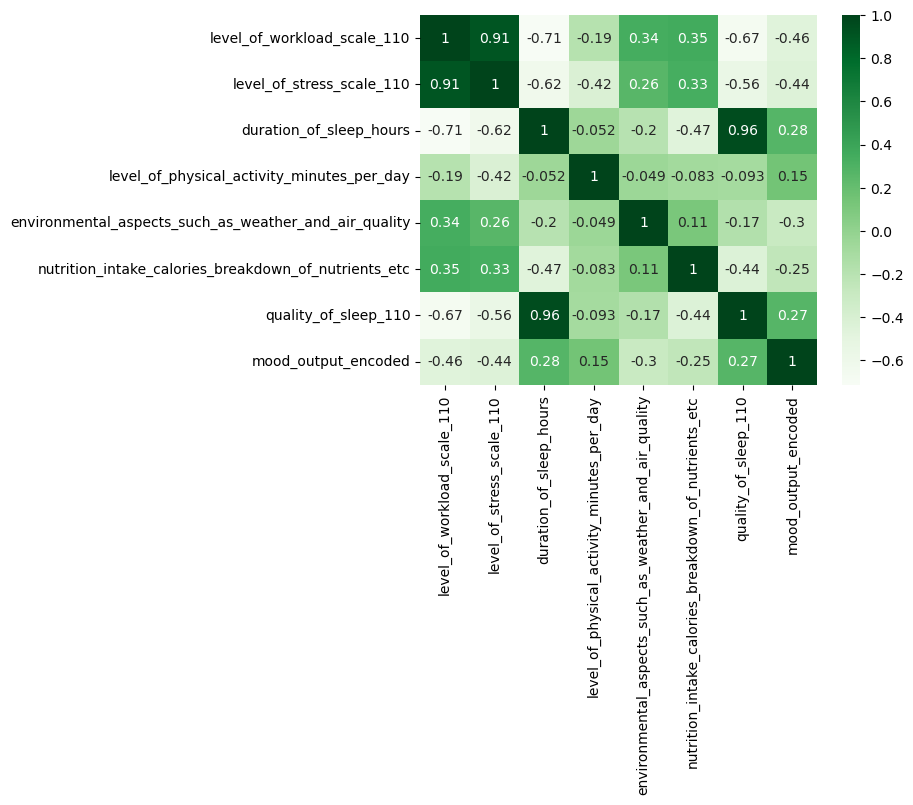

In [967]:
corr_features = ["level_of_workload_scale_110", "level_of_stress_scale_110", "duration_of_sleep_hours", 
                        "level_of_physical_activity_minutes_per_day", 'environmental_aspects_such_as_weather_and_air_quality'
                , 'nutrition_intake_calories_breakdown_of_nutrients_etc', 'quality_of_sleep_110', 'mood_output_encoded']

corre = df_aug[corr_features].corr()['mood_output_encoded']

testingdf = df_aug[corr_features]
matrix = testingdf.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

In [969]:
selected_features_aug = df_aug[["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_stress_scale_110", 
                                "level_of_workload_scale_110"]]
target_aug = df_aug["mood_output_encoded"]

In [971]:
X_train, X_rest_aug, y_train, y_rest_aug = train_test_split(selected_features_aug, target_aug, test_size = 0.2, random_state = 42)
X_validate, X_test, y_validate, y_test = train_test_split(X_rest_aug, y_rest_aug, test_size = 0.5, random_state = 42)

print("Total number of data:", df_aug.shape[0])
print("Training set:", X_train.shape[0])
print("Validation set:", X_validate.shape[0])
print("Testing set:", X_test.shape[0])

Total number of data: 1400
Training set: 1120
Validation set: 140
Testing set: 140


In [973]:
MultiLog_Reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000)

MultiLog_Reg.fit(X_train, y_train)
print("MultiLog Training Done")

RF_Reg = RandomForestRegressor(random_state = 42)
RF_Class = RandomForestClassifier(random_state = 42)

RF_Reg.fit(X_train, y_train)
RF_Class.fit(X_train, y_train)
print("RandFor Training Done")

MultiLog Training Done
RandFor Training Done


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [975]:
ML_test_pred = MultiLog_Reg.predict(X_test)
RF_class_test_pred = RF_Class.predict(X_test)
RF_Reg_test_pred = RF_Reg.predict(X_test)

ML_MAE = MAE(y_test, ML_test_pred)
ML_MSE = MSE(y_test, ML_test_pred)
ML_R2 = R2(y_test, ML_test_pred)

RF_MAE = MAE(y_test, RF_Reg_test_pred)
RF_MSE = MSE(y_test, RF_Reg_test_pred)
RF_R2 = R2(y_test, RF_Reg_test_pred)

RF_class_report = classification_report(y_test, RF_class_test_pred)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", ML_MAE)
print("Mean Square Error:", ML_MSE)
print("R-2 Score:", ML_R2)
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", RF_MAE)
print("Mean Square Error:", RF_MSE)
print("R-2 Score:", RF_R2)
print()
print("RF Classification report:")
print(RF_class_report)

Multinomial Logistic Regression:
Mean Absolute Error: 0.4142857142857143
Mean Square Error: 0.5714285714285714
R-2 Score: 0.17373662855035032

Random Forest Regression:
Mean Absolute Error: 0.3791683238908829
Mean Square Error: 0.3655982586966993
R-2 Score: 0.47135921280300197

RF Classification report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69        51
           1       0.62      0.67      0.64        43
           2       0.77      0.72      0.74        46

    accuracy                           0.69       140
   macro avg       0.69      0.69      0.69       140
weighted avg       0.70      0.69      0.69       140



## Testing the Models with Tracker Log Data Set

In order to have a good enough size of the tracker log data, we collected our own data as well as performed data augmentation so the size of the data set is 5000.

In [1014]:
testDf = pd.read_csv("CS-GY-6923 Log Tracker  - Daily Questions.csv")

testDf.columns

testDf.head()

,Date,Duration of Sleep (hours),Quality of Sleep (1-10),Daily Weigh-in,BMI Category,"Nutrition Intake (calories, breakdown of nutrients, etc.)",Level of Physical Activity (minutes per day),Heart Rate (bpm),Systolic and Diastolic Blood Pressure,Level of Stress (scale: 1–10),Level of Workload (scale: 1–10),Environmental Aspects (such as weather and air quality),"Additional health indicators (e.g., water levels, steps)",Emotion Classification,Notes
0,03/14/2025,4,5,126.5,Normal,1750,60,71,117/55,6,5,"Sunny, Good Air Quality","1.5 Liter, 1000 Steps",Negative,Barely had any sleep
1,03/15/2025,5,5,126.0,Normal,1700,20,69,114/53,5,4,"Cloudy, Good Air Quality","1.25 Liter, 2105 Steps",Neutral,Regular day
2,03/16/2025,6,6,125.6,Normal,1800 (High in Protein),75,68,111/51,3,4,"Cloudy, Good Air Quality","1 Liter, 8851 Steps",Positive,Went out for a long jog
3,03/17/2025,6,6,126.2,Normal,"1900 (High in Carbs, Balanced)",80,70,102/55,2,4,"Cloudy, Good Air Quality","0.75 Liter, 2251 Steps",Positive,Went out for a short jog and lifted weights
4,03/18/2025,7,7,126.8,Normal,"1760 (Low in Protein, Healthy)",90,67,118/53,3,3,"Sunny, Good Air Quality","0.85 Liter, 11080 Steps",Positive,"Went out for a long jog, good weather"


In [1016]:
print(np.where(testDf['Quality of Sleep  (1-10)'] > 10))
print(np.where(testDf['Quality of Sleep  (1-10)'] < 1))

print(np.where(testDf['Level of Stress (scale: 1–10)'] > 10))
print(np.where(testDf['Level of Stress (scale: 1–10)'] < 1))

print(np.where(testDf['Level of Workload (scale: 1–10)'] > 10))
print(np.where(testDf['Level of Workload (scale: 1–10)'] < 1))

print(np.where(testDf['Duration of Sleep (hours)'] > 12))
print(np.where(testDf['Duration of Sleep (hours)'] < 2))

print(np.where(testDf['Level of Physical Activity (minutes per day)'] < 0))

for i in np.where(testDf['Level of Physical Activity (minutes per day)'] > 60)[0]:
    testDf.loc[i, 'Level of Physical Activity (minutes per day)'] = 60

print(np.where(testDf['Level of Physical Activity (minutes per day)'] > 60))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [1018]:
testDf = testDf.rename(columns={'Quality of Sleep  (1-10)': 'quality_of_sleep_110',
                          'Level of Stress (scale: 1–10)': "level_of_stress_scale_110",
                          'Level of Workload (scale: 1–10)': "level_of_workload_scale_110",
                          'Duration of Sleep (hours)': "duration_of_sleep_hours",
                            'Level of Physical Activity (minutes per day)': "level_of_physical_activity_minutes_per_day",
                            'Nutrition Intake (calories, breakdown of nutrients, etc.)': 'nutrition_intake_calories_breakdown_of_nutrients_etc',
                            'Environmental Aspects (such as weather and air quality)': 'environmental_aspects_such_as_weather_and_air_quality',
                            'Emotion Classification': "mood_output"})

# Cleaning nutrition intake
for i in range(len(testDf['nutrition_intake_calories_breakdown_of_nutrients_etc'])):
    testDf.loc[i, 'nutrition_intake_calories_breakdown_of_nutrients_etc'] = testDf['nutrition_intake_calories_breakdown_of_nutrients_etc'][i][:4]

# Cleaning env aspects
for i in range(len(testDf['environmental_aspects_such_as_weather_and_air_quality'])):
    testDf.loc[i, 'environmental_aspects_such_as_weather_and_air_quality'] = testDf['environmental_aspects_such_as_weather_and_air_quality'][i].split(',')[0]

# Encoding cleaned env aspects
testDf['environmental_aspects_such_as_weather_and_air_quality'] = encoder_env.transform(testDf['environmental_aspects_such_as_weather_and_air_quality'])

# Converting mood output values
for i in np.where(testDf["mood_output"] == 'Sad'):
    testDf.loc[i, "mood_output"] = "Negative"
for i in np.where(testDf["mood_output"] == 'Happy'):
    testDf.loc[i, "mood_output"] = "Positive" 

# Encoding mood_output
testDf["mood_output_encoded"] = encoder_mood.transform(testDf["mood_output"])

testDf.head()

,Date,duration_of_sleep_hours,quality_of_sleep_110,Daily Weigh-in,BMI Category,nutrition_intake_calories_breakdown_of_nutrients_etc,level_of_physical_activity_minutes_per_day,Heart Rate (bpm),Systolic and Diastolic Blood Pressure,level_of_stress_scale_110,level_of_workload_scale_110,environmental_aspects_such_as_weather_and_air_quality,"Additional health indicators (e.g., water levels, steps)",mood_output,Notes,mood_output_encoded
0,03/14/2025,4,5,126.5,Normal,1750,60,71,117/55,6,5,2,"1.5 Liter, 1000 Steps",Negative,Barely had any sleep,0
1,03/15/2025,5,5,126.0,Normal,1700,20,69,114/53,5,4,0,"1.25 Liter, 2105 Steps",Neutral,Regular day,1
2,03/16/2025,6,6,125.6,Normal,1800,60,68,111/51,3,4,0,"1 Liter, 8851 Steps",Positive,Went out for a long jog,2
3,03/17/2025,6,6,126.2,Normal,1900,60,70,102/55,2,4,0,"0.75 Liter, 2251 Steps",Positive,Went out for a short jog and lifted weights,2
4,03/18/2025,7,7,126.8,Normal,1760,60,67,118/53,3,3,2,"0.85 Liter, 11080 Steps",Positive,"Went out for a long jog, good weather",2


<Axes: >

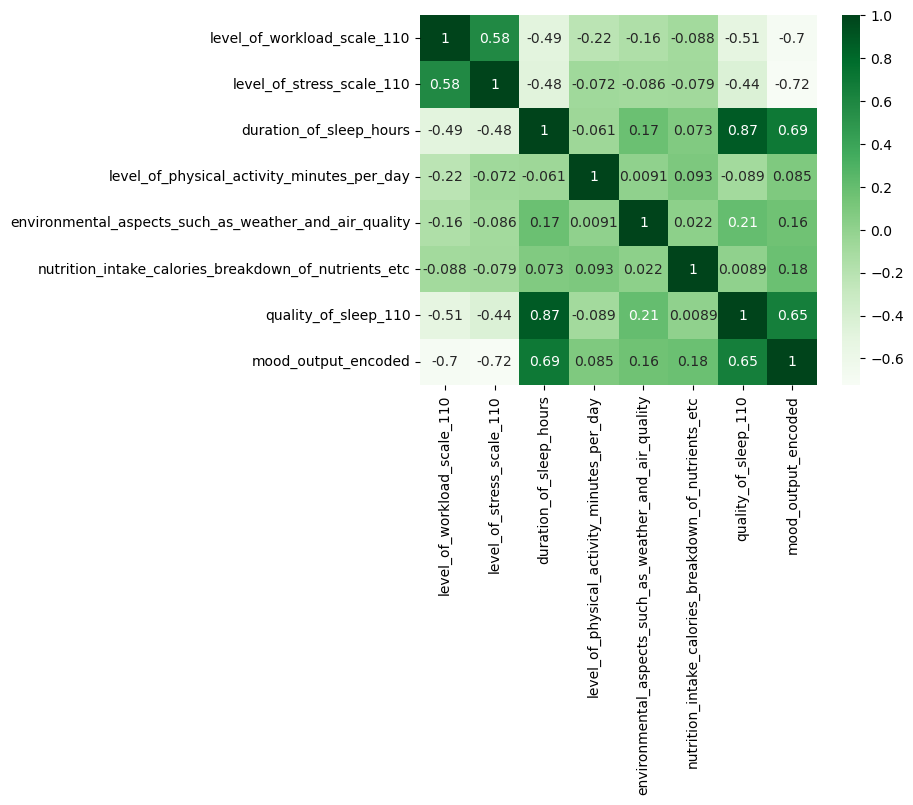

In [1020]:
corr_features = ["level_of_workload_scale_110", "level_of_stress_scale_110", "duration_of_sleep_hours", 
                        "level_of_physical_activity_minutes_per_day", 'environmental_aspects_such_as_weather_and_air_quality'
                , 'nutrition_intake_calories_breakdown_of_nutrients_etc', 'quality_of_sleep_110', 'mood_output_encoded']

corre = testDf[corr_features].corr()['mood_output_encoded']

testingdf = testDf[corr_features]
matrix = testingdf.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

In [1022]:
if testDf.isnull().any().any():
    testDf = testDf.dropna()
    
features_test = ["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_stress_scale_110", 
                                "level_of_workload_scale_110"]
target_test = ["mood_output_encoded"]

features_logTest = testDf[features_test]
target_logTest = testDf[target_test]

ML_tracker_pred = MultiLog_Reg.predict(features_logTest)
RF_tracker_pred = RF_Reg.predict(features_logTest)

ML_tracker_MAE = MAE(target_logTest, ML_tracker_pred)
ML_tracker_MSE = MSE(target_logTest, ML_tracker_pred)
ML_tracker_R2 = R2(target_logTest, ML_tracker_pred)

RF_tracker_MAE = MAE(target_logTest, RF_tracker_pred)
RF_tracker_MSE = MSE(target_logTest, RF_tracker_pred)
RF_tracker_R2 = R2(target_logTest, RF_tracker_pred)

RF_tracker_class = RF_Class.predict(features_logTest)
RF_tracker_report = classification_report(target_logTest, RF_tracker_class)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", ML_tracker_MAE)
print("Mean Square Error:", ML_tracker_MSE)
print("R-2 Score:", ML_tracker_R2)
print("Accuracy:", accuracy_score(target_logTest, ML_tracker_pred2))
print()
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", RF_tracker_MAE)
print("Mean Square Error:", RF_tracker_MSE)
print("R-2 Score:", RF_tracker_R2)
print(RF_tracker_report)


Multinomial Logistic Regression:
Mean Absolute Error: 0.5294117647058824
Mean Square Error: 0.7058823529411765
R-2 Score: -0.2592592592592593
Accuracy: 0.17647058823529413


Random Forest Regression:
Mean Absolute Error: 0.8109389600812483
Mean Square Error: 0.9491829786117224
R-2 Score: -0.693295560609801
              precision    recall  f1-score   support

           0       0.05      0.17      0.08         6
           1       0.00      0.00      0.00        12
           2       0.30      0.19      0.23        16

    accuracy                           0.12        34
   macro avg       0.12      0.12      0.10        34
weighted avg       0.15      0.12      0.12        34



In [1024]:
ML_tracker_pred2 = Mul_Norm_LogReg.predict(features_logTest)
RF_tracker_pred2 = rand_for.predict(features_logTest)

ML_tracker_MAE2 = MAE(target_logTest, ML_tracker_pred2)
ML_tracker_MSE2 = MSE(target_logTest, ML_tracker_pred2)
ML_tracker_R2_2 = R2(target_logTest, ML_tracker_pred2)

RF_tracker_MAE2 = MAE(target_logTest, RF_tracker_pred2)
RF_tracker_MSE2 = MSE(target_logTest, RF_tracker_pred2)
RF_tracker_R2_2 = R2(target_logTest, RF_tracker_pred2)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", ML_tracker_MAE2)
print("Mean Square Error:", ML_tracker_MSE2)
print("R-2 Score:", ML_tracker_R2_2)
print("Accuracy:", accuracy_score(target_logTest, ML_tracker_pred2))
print()
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", RF_tracker_MAE2)
print("Mean Square Error:", RF_tracker_MSE2)
print("R-2 Score:", RF_tracker_R2_2)
# print("Accuracy:", rand_for.score(target_logTest, RF_tracker_pred2))

Multinomial Logistic Regression:
Mean Absolute Error: 1.3235294117647058
Mean Square Error: 2.264705882352941
R-2 Score: -3.0401234567901234
Accuracy: 0.14705882352941177


Random Forest Regression:
Mean Absolute Error: 1.112647058823529
Mean Square Error: 1.5810852941176472
R-2 Score: -1.8205780864197534
